In [2]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [3]:
ticker = 'WFC'

mysql = Mysql()

In [4]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-30 11:00:00,30.00,30.3000,30.100,30.20,0.000000,14700
1,2020-03-30 12:00:00,29.86,30.3000,30.300,30.12,0.000000,116810
2,2020-03-30 13:00:00,28.94,30.5200,28.970,30.23,0.007261,3828470
3,2020-03-30 14:00:00,28.89,29.3400,29.080,28.96,-0.038663,6901463
4,2020-03-30 15:00:00,29.04,29.6650,29.550,29.08,0.011077,5080257
...,...,...,...,...,...,...,...
8,2021-03-29 18:00:00,38.30,38.5600,38.415,38.34,0.000909,2522694
9,2021-03-29 19:00:00,38.38,38.7100,38.440,38.42,0.003890,5891549
10,2021-03-29 20:00:00,38.33,38.5272,38.350,38.50,-0.004722,388159


In [8]:
data = mysql.get_closes_by_symbol(ticker)

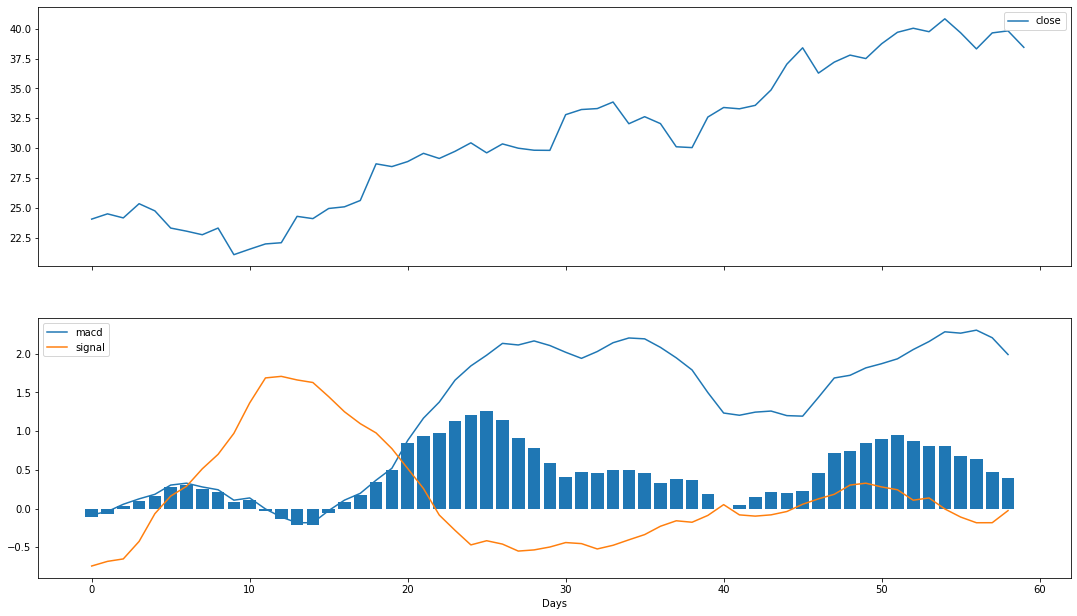

In [9]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

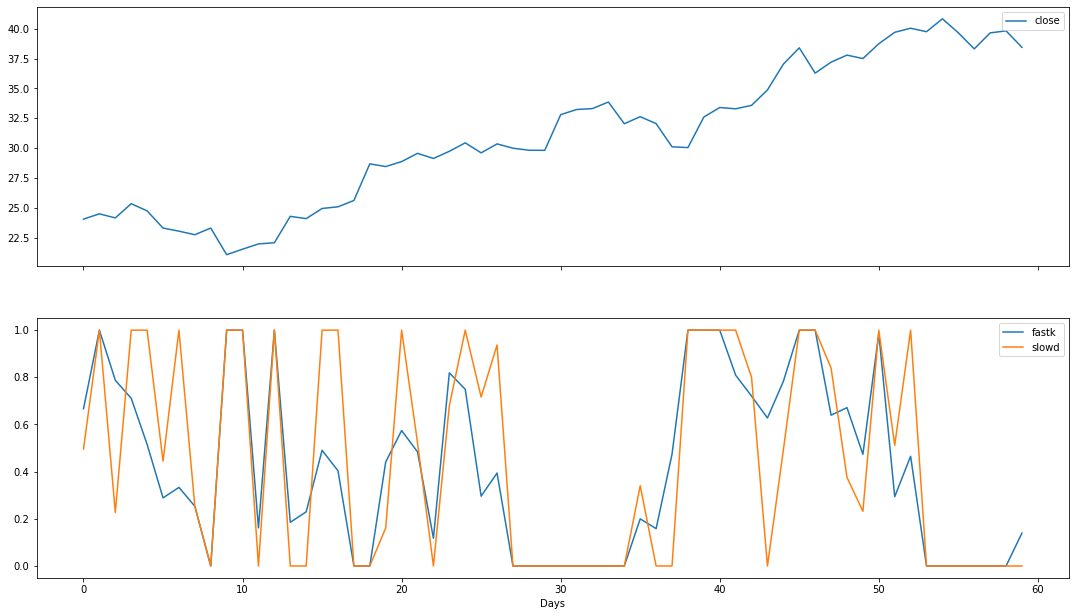

In [10]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)